# Tidy Data

In [1]:
#loading modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
table1 = pd.read_csv("Data_3/table1.csv")
table1

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [3]:
table2 = pd.read_csv("Data_3/table2.csv")
table2

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,1999,population,19987071
2,Afghanistan,2000,cases,2666
3,Afghanistan,2000,population,20595360
4,Brazil,1999,cases,37737
5,Brazil,1999,population,172006362
6,Brazil,2000,cases,80488
7,Brazil,2000,population,174504898
8,China,1999,cases,212258
9,China,1999,population,1272915272


In [4]:
table3 = pd.read_csv("Data_3/table3.csv")
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [5]:
table4a = pd.read_csv("Data_3/table4a.csv")
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [6]:
table4b = pd.read_csv("Data_3/table4b.csv")
table4b

,country,1999,2000
0,Afghanistan,19987071,20595360
1,Brazil,172006362,174504898
2,China,1272915272,1280428583


In [7]:
table5 = pd.read_csv("Data_3/table5.csv", dtype = {'year': 'str', 'century':'str'})
table5

,country,century,year,rate
0,Afghanistan,19,99,745/19987071
1,Afghanistan,20,00,2666/20595360
2,Brazil,19,99,37737/172006362
3,Brazil,20,00,80488/174504898
4,China,19,99,212258/1272915272
5,China,20,00,213766/1280428583


<hr style="border:1px solid black">
<hr style="border:1px solid black">


## 1.1 Graphing and transforming Tidy vs Untidy Data

### 1.1.1 Graphing and transforming Tidy data

In [8]:
# Compute rate per 10,000

table1.assign(rate = table1.cases/table1.population*10000)

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


In [9]:
# Compute cases per year

table1.groupby('year').agg({'cases': 'sum'}).reset_index()

,year,cases
0,1999,250740
1,2000,296920


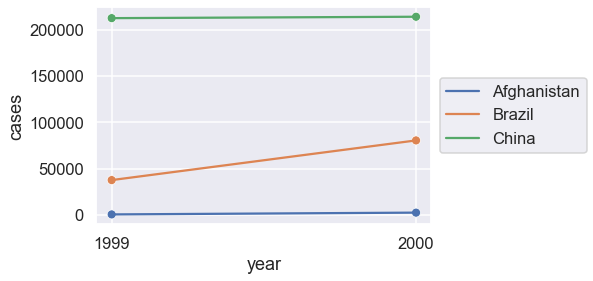

In [10]:
# Visualise cases changes over time

sns.set('talk')
fig, ax = plt.subplots()
sns.lineplot(data = table1, x = 'year', y = 'cases',
           hue = 'country')
sns.scatterplot(data = table1, x = 'year', y = 'cases',
           hue = 'country', legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1999, 2000], ['1999', '2000'])

plt.show()

<hr style="border:1px solid black">

### 1.1.2 Graphing and transforming Untidy data: table2

Computing rate for table2

In [11]:
cases_df = table2.query('type == "cases"').reset_index(drop = True)
cases_df

,country,year,type,count
0,Afghanistan,1999,cases,745
1,Afghanistan,2000,cases,2666
2,Brazil,1999,cases,37737
3,Brazil,2000,cases,80488
4,China,1999,cases,212258
5,China,2000,cases,213766


In [12]:
population_df = table2.query('type == "population"').reset_index(drop = True)
population_df

,country,year,type,count
0,Afghanistan,1999,population,19987071
1,Afghanistan,2000,population,20595360
2,Brazil,1999,population,172006362
3,Brazil,2000,population,174504898
4,China,1999,population,1272915272
5,China,2000,population,1280428583


In [13]:
rate_df = table2.filter(["country", "year"]).drop_duplicates().\
reset_index(drop = True).\
assign(count = cases_df["count"]/population_df["count"]*10000,
      type = "cases_per_cases")

In [14]:
pd.concat([table2, rate_df], axis = 0).sort_values(['country', 'year', 'type'])

,country,year,type,count
0,Afghanistan,1999,cases,7.450000e+02
0,Afghanistan,1999,cases_per_cases,3.727410e-01
1,Afghanistan,1999,population,1.998707e+07
2,Afghanistan,2000,cases,2.666000e+03
1,Afghanistan,2000,cases_per_cases,1.294466e+00
3,Afghanistan,2000,population,2.059536e+07
4,Brazil,1999,cases,3.773700e+04
2,Brazil,1999,cases_per_cases,2.193930e+00
5,Brazil,1999,population,1.720064e+08
6,Brazil,2000,cases,8.048800e+04


Compute cases per year for table2

In [15]:
table2.query('type == "cases"').groupby('year').agg({'count': 'sum'}).reset_index()

,year,count
0,1999,250740
1,2000,296920


Visualise cases changes over time for table2

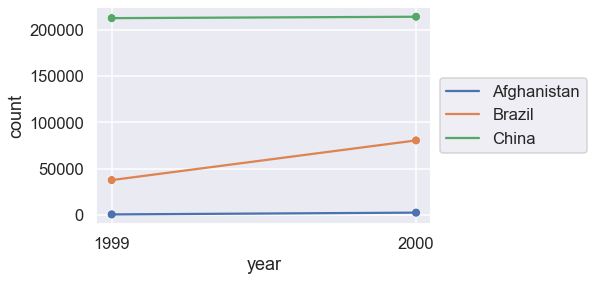

In [16]:
sns.set('talk')
fig, ax = plt.subplots()
sns.lineplot(data = table2.query('type == "cases"'), x = 'year', y = 'count',
           hue = 'country')
sns.scatterplot(data = table2.query('type == "cases"'), x = 'year', y = 'count',
           hue = 'country', legend=False)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([1999, 2000], ['1999', '2000'])

plt.show()

<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 2. Pivoting

* The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data. 

* The second step is to resolve one of two common problems:
    - One variable might be spread across multiple columns.
    - One observation might be scattered across multiple rows.

## 2.1 Pivoting Longer
    - One variable might be spread across multiple columns.
    - melt()


In [17]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


In [18]:
table4a.melt(id_vars=['country'], value_vars=["1999", "2000"],
            value_name="cases",var_name = "year")

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


<hr style="border:1px solid black">

## 2.2 Pivoting Wider

    - One observation might be scattered across multiple rows.
    - pivot()
    - pivot_table(): generally can be used when there are duplicated values
Check [this](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) for an example.

In [19]:
#reset_index(): Convert index to column
table2.pivot(columns = 'type', 
             values = 'count',
             index=['country','year']).reset_index().\
rename_axis(None, axis=1) # remove name "type" from the index

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


In [20]:
table2.pivot_table(columns = 'type', 
             values = 'count',
             index=['country','year']).reset_index().\
rename_axis(None, axis=1) # remove name "type" from the index

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 3. Separating and Uniting

## 3.1 Separate Columns

In [21]:
table3

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


In [22]:
table3 = pd.read_csv("Data_3/table3.csv")

table1_sep = table3['rate'].\
str.split(pat = '/', n = 1, expand=True).\
rename(columns = {0:"cases", 1:"population"})
    
pd.concat([table3,table1_sep], axis = 1).drop("rate", axis = 1)

,country,year,cases,population
0,Afghanistan,1999,745,19987071
1,Afghanistan,2000,2666,20595360
2,Brazil,1999,37737,172006362
3,Brazil,2000,80488,174504898
4,China,1999,212258,1272915272
5,China,2000,213766,1280428583


<hr style="border:1px solid black">

## 3.2 Uniting Columns

In [23]:
table5 = pd.read_csv("Data_3/table5.csv", dtype = {'year': 'str', 'century':'str'})

table5['year'] = table5['century'] + table5['year']
table5.drop('century', axis = 1)

,country,year,rate
0,Afghanistan,1999,745/19987071
1,Afghanistan,2000,2666/20595360
2,Brazil,1999,37737/172006362
3,Brazil,2000,80488/174504898
4,China,1999,212258/1272915272
5,China,2000,213766/1280428583


<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 4. Missing Vlaues

Changing representation of dataset brings up an important subtlety of missing values.

* Explicitly, i.e. flagged with NA.
* Implicitly, i.e. simply not present in the data.

In [24]:
stocks = pd.DataFrame({'year':[2015, 2015, 2015, 2015, 2016, 2016, 2016],
    'qtr': [ 1,    2,    3,    4,    2,    3,    4],
    'return_1': [1.88, 0.59, 0.35,   np.nan, 0.92, 0.17, 2.66]}
)

stocks 

,year,qtr,return_1
0,2015,1,1.88
1,2015,2,0.59
2,2015,3,0.35
3,2015,4,NaN
4,2016,2,0.92
5,2016,3,0.17
6,2016,4,2.66


* Explicitly -  Year 2015 and quarter 4 has explicit missing return.
* Implicitly -  return for 1st quarter of year 2016 is missing.

Turning implicit values explicit

In [25]:
stocks_wider = stocks.pivot(columns = 'year', 
             values = 'return_1',
             index=['qtr']).reset_index().\
rename_axis(None, axis=1) # remove name "type" from the index

stocks_wider.columns

Index(['qtr', 2015, 2016], dtype='object')

Turning explicit missing values implicit and imputing missing values

In [26]:
stocks_longer = stocks_wider.melt(id_vars= ["qtr"], value_vars=[2015, 2016],
                 value_name="return_1",var_name = "year").dropna()

stocks_longer

,qtr,year,return_1
0,1,2015,1.88
1,2,2015,0.59
2,3,2015,0.35
5,2,2016,0.92
6,3,2016,0.17
7,4,2016,2.66


In [27]:
import janitor

stocks_longer.complete('qtr', 'year')

/Users/jnakarmi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,qtr,year,return_1
0,1,2015.0,1.88
1,2,2015.0,0.59
2,3,2015.0,0.35
3,2,2016.0,0.92
4,3,2016.0,0.17
5,4,2016.0,2.66
6,1,2016,NaN
7,4,2015,NaN


Imputing missing value

In [28]:
# Fill Missing values in specifice columns
stocks_longer.iloc[2,1] = np.nan
stocks_longer.complete('qtr', 'year').fillna({'return_1': -999})

/Users/jnakarmi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/reshape/merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


,qtr,year,return_1
0,1,2015.0,1.88
1,2,2015.0,0.59
2,3,NaN,0.35
3,2,2016.0,0.92
4,3,2016.0,0.17
5,4,2016.0,2.66
6,1,NaN,-999.00
7,1,2016,-999.00
8,2,NaN,-999.00
9,3,2015,-999.00


<hr style="border:1px solid black">
<hr style="border:1px solid black">

# 5. Tidy "who" Dataset

In [29]:
who = pd.read_csv("Data_3/who.csv")
who

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,AF,AFG,1980,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AF,AFG,1981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AF,AFG,1982,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,1983,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,1984,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zimbabwe,ZW,ZWE,2009,125.0,578.0,NaN,3471.0,681.0,293.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,ZW,ZWE,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,ZW,ZWE,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
who.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 60 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   iso2          7206 non-null   object 
 2   iso3          7240 non-null   object 
 3   year          7240 non-null   int64  
 4   new_sp_m014   3173 non-null   float64
 5   new_sp_m1524  3209 non-null   float64
 6   new_sp_m2534  3206 non-null   float64
 7   new_sp_m3544  3219 non-null   float64
 8   new_sp_m4554  3223 non-null   float64
 9   new_sp_m5564  3218 non-null   float64
 10  new_sp_m65    3209 non-null   float64
 11  new_sp_f014   3174 non-null   float64
 12  new_sp_f1524  3194 non-null   float64
 13  new_sp_f2534  3200 non-null   float64
 14  new_sp_f3544  3199 non-null   float64
 15  new_sp_f4554  3204 non-null   float64
 16  new_sp_f5564  3195 non-null   float64
 17  new_sp_f65    3197 non-null   float64
 18  new_sn_m014   1045 non-null 

In [31]:
# Counting total missing values in each column
who.isnull().sum()

country            0
iso2              34
iso3               0
year               0
new_sp_m014     4067
new_sp_m1524    4031
new_sp_m2534    4034
new_sp_m3544    4021
new_sp_m4554    4017
new_sp_m5564    4022
new_sp_m65      4031
new_sp_f014     4066
new_sp_f1524    4046
new_sp_f2534    4040
new_sp_f3544    4041
new_sp_f4554    4036
new_sp_f5564    4045
new_sp_f65      4043
new_sn_m014     6195
new_sn_m1524    6210
new_sn_m2534    6218
new_sn_m3544    6215
new_sn_m4554    6213
new_sn_m5564    6219
new_sn_m65      6220
new_sn_f014     6200
new_sn_f1524    6218
new_sn_f2534    6224
new_sn_f3544    6220
new_sn_f4554    6222
new_sn_f5564    6223
new_sn_f65      6221
new_ep_m014     6202
new_ep_m1524    6214
new_ep_m2534    6220
new_ep_m3544    6216
new_ep_m4554    6220
new_ep_m5564    6225
new_ep_m65      6222
new_ep_f014     6208
new_ep_f1524    6219
new_ep_f2534    6219
new_ep_f3544    6219
new_ep_f4554    6223
new_ep_f5564    6223
new_ep_f65      6226
newrel_m014     7050
newrel_m1524 

<hr style="border:1px solid black">

1. Drop reduntant columns

In [32]:
# Drop redundant columns
who_1 = who.drop(columns = ['iso2', 'iso3'])
who_1

,country,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,new_sp_m65,new_sp_f014,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
0,Afghanistan,1980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,Zimbabwe,2009,125.0,578.0,NaN,3471.0,681.0,293.0,192.0,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,252.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,278.0,174.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,271.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<hr style="border:1px solid black">

2. "###\_**\_^^^" columns should be values instead.

In [43]:
# Select the column names to be melted
value_vars_select = who_1.columns[2:]

#pivot long and drop missing values
who_2 = who_1.melt(id_vars=['country', 'year'],
          value_vars= value_vars_select,
          value_name = 'TB_cases',
          var_name = 'key').dropna()
who_2

,country,year,key,TB_cases
17,Afghanistan,1997,new_sp_m014,0.0
18,Afghanistan,1998,new_sp_m014,30.0
19,Afghanistan,1999,new_sp_m014,8.0
20,Afghanistan,2000,new_sp_m014,52.0
21,Afghanistan,2001,new_sp_m014,129.0
...,...,...,...,...
405269,Viet Nam,2013,newrel_f65,3110.0
405303,Wallis and Futuna Islands,2013,newrel_f65,2.0
405371,Yemen,2013,newrel_f65,360.0
405405,Zambia,2013,newrel_f65,669.0


<hr style="border:1px solid black">

3. Investigate the key column

In [34]:
who_2['key'].value_counts(sort = True).head(10)

new_sp_m4554    3223
new_sp_m3544    3219
new_sp_m5564    3218
new_sp_m65      3209
new_sp_m1524    3209
new_sp_m2534    3206
new_sp_f4554    3204
new_sp_f2534    3200
new_sp_f3544    3199
new_sp_f65      3197
Name: key, dtype: int64

<hr style="border:1px solid black">

4. Read the data dictionary

    a) The first three letters of each column denote whether the column contains new or old cases of TB. In this dataset, each column contains new cases.
    
    b) The next two letters describe the type of TB:
            * rel stands for cases of relapse
            * ep stands for cases of extrapulmonary TB
            * sn stands for cases of pulmonary TB that could not be diagnosed by a pulmonary smear (smear negative)
            * sp stands for cases of pulmonary TB that could be diagnosed by a pulmonary smear (smear positive)


    c) The sixth letter gives the sex of TB patients. The dataset groups cases by males (m) and females (f).

    d) The remaining numbers gives the age group. The dataset groups cases into seven age groups:

        * 014 = 0 – 14 years old
        * 1524 = 15 – 24 years old
        * 2534 = 25 – 34 years old
        * 3544 = 35 – 44 years old
        * 4554 = 45 – 54 years old
        * 5564 = 55 – 64 years old
        * 65 = 65 or older


<hr style="border:1px solid black">

5. Change values in key that says "newrel" to "new_rel"

In [35]:
who_5 = who_2.assign(key = who_2['key'].str.replace("newrel", "new_rel"))

who_5

,country,year,key,TB_cases
17,Afghanistan,1997,new_sp_m014,0.0
18,Afghanistan,1998,new_sp_m014,30.0
19,Afghanistan,1999,new_sp_m014,8.0
20,Afghanistan,2000,new_sp_m014,52.0
21,Afghanistan,2001,new_sp_m014,129.0
...,...,...,...,...
405269,Viet Nam,2013,new_rel_f65,3110.0
405303,Wallis and Futuna Islands,2013,new_rel_f65,2.0
405371,Yemen,2013,new_rel_f65,360.0
405405,Zambia,2013,new_rel_f65,669.0


<hr style="border:1px solid black">

6. Split the values in "key" column using the data dictionary

In [36]:
who_6_1 = who_5['key'].str.split("_", n=2, expand=True).\
rename(columns = {0: "new", 1: "type_TB", 2:"sex_age"})

who_6 = pd.concat([who_5, who_6_1], axis = 1).drop("key", axis = 1)

who_6 

,country,year,TB_cases,new,type_TB,sex_age
17,Afghanistan,1997,0.0,new,sp,m014
18,Afghanistan,1998,30.0,new,sp,m014
19,Afghanistan,1999,8.0,new,sp,m014
20,Afghanistan,2000,52.0,new,sp,m014
21,Afghanistan,2001,129.0,new,sp,m014
...,...,...,...,...,...,...
405269,Viet Nam,2013,3110.0,new,rel,f65
405303,Wallis and Futuna Islands,2013,2.0,new,rel,f65
405371,Yemen,2013,360.0,new,rel,f65
405405,Zambia,2013,669.0,new,rel,f65


<hr style="border:1px solid black">

7. Drop redundant or unnecessary columns

In [37]:
who_6['new'].value_counts()

who_7 = who_6.drop("new", axis = 1)

who_7

,country,year,TB_cases,type_TB,sex_age
17,Afghanistan,1997,0.0,sp,m014
18,Afghanistan,1998,30.0,sp,m014
19,Afghanistan,1999,8.0,sp,m014
20,Afghanistan,2000,52.0,sp,m014
21,Afghanistan,2001,129.0,sp,m014
...,...,...,...,...,...
405269,Viet Nam,2013,3110.0,rel,f65
405303,Wallis and Futuna Islands,2013,2.0,rel,f65
405371,Yemen,2013,360.0,rel,f65
405405,Zambia,2013,669.0,rel,f65


<hr style="border:1px solid black">

8. Split the sex_age column

In [38]:
who_8_1 = who_7["sex_age"].str.split(pat = '([A-Za-z]+)(\d+)', expand = True).\
rename(columns = {1:"sex", 2: "age"}).\
filter(["sex", "age"])

who_8 = pd.concat([who_7, who_8_1], axis = 1).drop('sex_age', axis = 1)

who_8

,country,year,TB_cases,type_TB,sex,age
17,Afghanistan,1997,0.0,sp,m,014
18,Afghanistan,1998,30.0,sp,m,014
19,Afghanistan,1999,8.0,sp,m,014
20,Afghanistan,2000,52.0,sp,m,014
21,Afghanistan,2001,129.0,sp,m,014
...,...,...,...,...,...,...
405269,Viet Nam,2013,3110.0,rel,f,65
405303,Wallis and Futuna Islands,2013,2.0,rel,f,65
405371,Yemen,2013,360.0,rel,f,65
405405,Zambia,2013,669.0,rel,f,65


In [39]:
# The codes I tried 

# who_7["sex_age"].str.split(pat = '\d+')
#who_7["sex_age"].str.split(pat = '[a-zA-Z]+')
#who_7["sex_age"].str.split(pat = '[a-zA-Z]+')
#who_7["sex_age"].str[0]

<hr style="border:1px solid black">

9. Format the age column

In [40]:
who_9_1 = who_8.copy()
who_9_1["age"] = who_9_1['age'].str.replace("014", "0014").str.replace("65", "6599")

who_9_1["age_S"] = who_9_1["age"].str[0:2]

who_9_1["age_E"] = who_9_1["age"].str[2:]

who_9_1["age_new"] = who_9_1["age_S"]  + "-" + who_9_1["age_E"]

who_9_1["age_new"] = who_9_1["age_new"].str.replace("65-99", "65 or older")

who_9 = who_9_1.drop(["age" , "age_S", "age_E"], axis = 1)

who_9

,country,year,TB_cases,type_TB,sex,age_new
17,Afghanistan,1997,0.0,sp,m,00-14
18,Afghanistan,1998,30.0,sp,m,00-14
19,Afghanistan,1999,8.0,sp,m,00-14
20,Afghanistan,2000,52.0,sp,m,00-14
21,Afghanistan,2001,129.0,sp,m,00-14
...,...,...,...,...,...,...
405269,Viet Nam,2013,3110.0,rel,f,65 or older
405303,Wallis and Futuna Islands,2013,2.0,rel,f,65 or older
405371,Yemen,2013,360.0,rel,f,65 or older
405405,Zambia,2013,669.0,rel,f,65 or older


In [41]:
who_9["age_new"].value_counts()

00-14          10882
45-54          10876
35-44          10875
15-24          10868
55-64          10851
25-34          10850
65 or older    10844
Name: age_new, dtype: int64